In [128]:
import chess
import chess.pgn
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


In [161]:
def is_endgame(board):
    # Endgame is defined as both queens being off the board
    return not board.pieces(chess.QUEEN, chess.WHITE) and not board.pieces(chess.QUEEN, chess.BLACK)

def is_rook_endgame(board):
    # Check if only rooks, pawns, and kings are left on the board for both sides
    pieces = board.piece_map().values()
    return all(piece.piece_type in [chess.ROOK, chess.KING, chess.PAWN] for piece in pieces)

def get_opponent_rating(game, username):
    if game.headers['White'] == username:
        return game.headers['BlackElo']
    else:
        return game.headers['WhiteElo']
    
def get_my_elo(game, username):
    if game.headers['White'] == username:
        return game.headers.get('WhiteElo', '???')
    else:
        return game.headers.get('BlackElo', '???')
    
def identify_opening(moves):
    if moves.startswith("e4 e5 Nf3 Nc6 d4 exd4 Bc4"):  # Example sequence for Scotch Gambit
        return "Scotch Gambit"
    elif moves.startswith("e4 c5 Nc3"):  # Example sequence for Grand Prix Attack
        return "Grand Prix Attack"
    elif moves.startswith("e4 Nf6"):  # Example sequence for Alekhine Defense
        return "Alekhine Defense"
    elif moves.startswith("d4 d5 c4 c6"):  # Example sequence for Slav Defense
        return "Slav Defense"
    else:
        return "Other"

In [162]:


def parse_pgn_file(filepath, username):
    games_data = []
    with open(filepath) as pgn_file:
        while True:
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break  # End of file

            headers = game.headers
            board = game.board()
            endgame_reached = False
            rook_endgame_reached = False
            termination = game.headers.get("Termination", "???")
            won_by_flagging = "emrecubukcu zamandan kazandı" in termination
            lost_by_flagging = "zamandan" in termination and not won_by_flagging  # Adjust this based on how losses are noted

            for move in game.mainline_moves():
                board.push(move)
                if is_endgame(board):
                    endgame_reached = True
                    rook_endgame_reached = is_rook_endgame(board)
                    break

            game_info = {
                "Date": headers.get("Date", "???"),
                "White": headers.get("White", "???"),
                "Black": headers.get("Black", "???"),
                "Result": headers.get("Result", "*"),
                "TimeControl": headers.get("TimeControl", "???"),
                "Termination": termination,
                "OpponentElo": get_opponent_rating(game, username),
                "MyElo": get_my_elo(game, username),
                "EndgameReached": endgame_reached,
                "RookEndgameReached": rook_endgame_reached,
                "WonByFlagging": won_by_flagging,
                "LostByFlagging": lost_by_flagging
            }
            games_data.append(game_info)

    return games_data

# Your username and path to PGN files
username = 'emrecubukcu'
directory_path = 'chess_games'

# List to store all games data
all_games_data = []

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".pgn"):
        filepath = os.path.join(directory_path, filename)
        all_games_data.extend(parse_pgn_file(filepath, username))

# Create DataFrame
df = pd.DataFrame(all_games_data)

# Display the first few rows of the DataFrame
print(df.head())

         Date           White        Black Result TimeControl  \
0  2023.03.04        rolsrojs  emrecubukcu    1-0       180+2   
1  2023.03.04     emrecubukcu     rolsrojs    0-1       180+2   
2  2023.03.04        stupac07  emrecubukcu    1-0       180+2   
3  2023.03.07  0zbigd0wnunder  emrecubukcu    0-1       180+2   
4  2023.03.07     emrecubukcu       Bikfhm    1-0       180+2   

                                        Termination OpponentElo MyElo  \
0     rolsrojs rakibinin terk etmesi sonucu kazandı        1996  1960   
1     rolsrojs rakibinin terk etmesi sonucu kazandı        2003  1953   
2     stupac07 rakibinin terk etmesi sonucu kazandı        2018  1946   
3  emrecubukcu rakibinin terk etmesi sonucu kazandı        1928  1954   
4  emrecubukcu rakibinin terk etmesi sonucu kazandı        2009  1963   

   EndgameReached  RookEndgameReached  WonByFlagging  LostByFlagging  
0           False               False          False           False  
1            True           

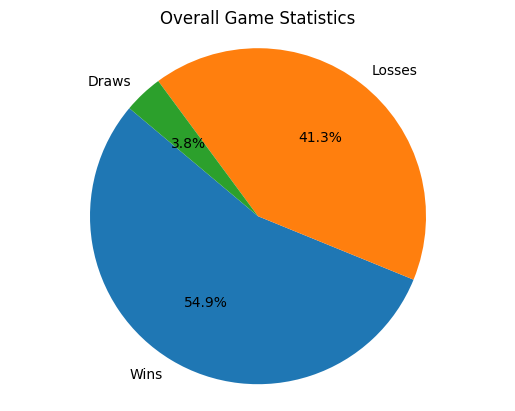

In [164]:
# Overall games statistics
total_games = len(df)
wins = len(df[((df['White'] == username) & (df['Result'] == '1-0')) | ((df['Black'] == username) & (df['Result'] == '0-1'))])
losses = len(df[((df['White'] == username) & (df['Result'] == '0-1')) | ((df['Black'] == username) & (df['Result'] == '1-0'))])
draws = len(df[df['Result'] == '1/2-1/2'])

# Calculate percentages
win_percentage = (wins / total_games) * 100
loss_percentage = (losses / total_games) * 100
draw_percentage = (draws / total_games) * 100

# Data for the pie chart
labels = ['Wins', 'Losses', 'Draws']
sizes = [win_percentage, loss_percentage, draw_percentage]

# Plot the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Overall Game Statistics')
plt.show()

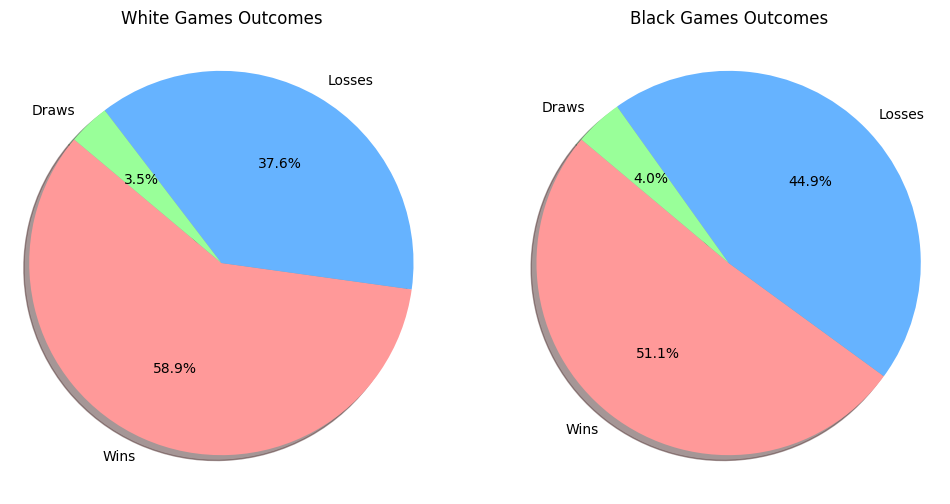

White Win Percentage: 58.92%
White Loss Percentage: 37.58%
White Draw Percentage: 3.50%
Black Win Percentage: 51.08%
Black Loss Percentage: 44.89%
Black Draw Percentage: 4.02%


In [132]:
games_as_white = df[df['White'] == username]
total_white_games = len(games_as_white)
white_wins = len(games_as_white[games_as_white['Result'] == '1-0'])
white_losses = len(games_as_white[games_as_white['Result'] == '0-1'])
white_draws = len(games_as_white[games_as_white['Result'] == '1/2-1/2'])
games_as_black = df[df['Black'] == username]
total_black_games = len(games_as_black)
black_wins = len(games_as_black[games_as_black['Result'] == '0-1'])
black_losses = len(games_as_black[games_as_black['Result'] == '1-0'])
black_draws = len(games_as_black[games_as_black['Result'] == '1/2-1/2'])

# Calculate percentages
white_win_percentage = (white_wins / total_white_games) * 100 if total_white_games > 0 else 0
white_loss_percentage = (white_losses / total_white_games) * 100 if total_white_games > 0 else 0
white_draw_percentage = (white_draws / total_white_games) * 100 if total_white_games > 0 else 0
black_win_percentage = (black_wins / total_black_games) * 100 if total_black_games > 0 else 0
black_loss_percentage = (black_losses / total_black_games) * 100 if total_black_games > 0 else 0
black_draw_percentage = (black_draws / total_black_games) * 100 if total_black_games > 0 else 0

# Labels for the slices
labels = ['Wins', 'Losses', 'Draws']

# Values for each slice
sizes_white = [white_win_percentage, white_loss_percentage, white_draw_percentage]
sizes_black = [black_win_percentage, black_loss_percentage, black_draw_percentage]

# Colors for each slice
colors = ['#ff9999','#66b3ff','#99ff99']

# Create pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# White games pie chart
ax1.pie(sizes_white, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
ax1.set_title('White Games Outcomes')

# Black games pie chart
ax2.pie(sizes_black, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
ax2.set_title('Black Games Outcomes')

# Equal aspect ratio ensures that pie chart is circular
ax1.axis('equal')
ax2.axis('equal')

plt.show()


print(f"White Win Percentage: {white_win_percentage:.2f}%")
print(f"White Loss Percentage: {white_loss_percentage:.2f}%")
print(f"White Draw Percentage: {white_draw_percentage:.2f}%")
print(f"Black Win Percentage: {black_win_percentage:.2f}%")
print(f"Black Loss Percentage: {black_loss_percentage:.2f}%")
print(f"Black Draw Percentage: {black_draw_percentage:.2f}%")

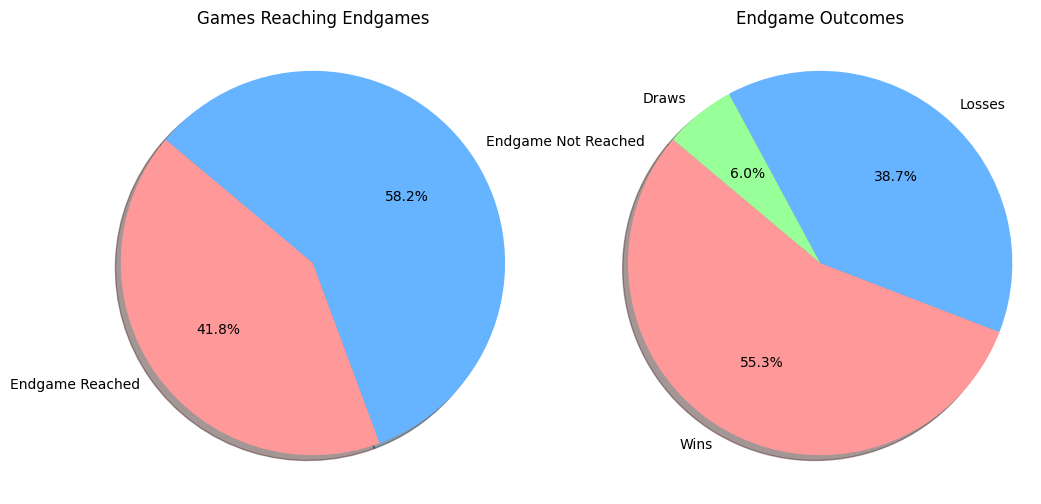

Percentage of games reaching endgame: 41.76%
Your win percentage in endgames: 55.26%


In [133]:
# Filtering games that reached endgame
endgame_games = df[df['EndgameReached']]

# Total games and total endgames
total_games = len(df)
total_endgames = len(endgame_games)

# Calculate percentage of games reaching endgame
percent_endgames = (total_endgames / total_games) * 100 if total_games > 0 else 0

# Filtering endgame games that you won
your_wins_endgame = endgame_games[((endgame_games['White'] == username) & (endgame_games['Result'] == '1-0')) | 
                                  ((endgame_games['Black'] == username) & (endgame_games['Result'] == '0-1'))]
total_wins_endgame = len(your_wins_endgame)

# Calculate your win percentage in endgames
win_percent_endgames = (total_wins_endgame / total_endgames) * 100 if total_endgames > 0 else 0

your_draws_endgame = endgame_games[endgame_games['Result'] == '1/2-1/2']
total_draws_endgame = len(your_draws_endgame)

your_losses_endgame = endgame_games[((endgame_games['White'] == username) & (endgame_games['Result'] == '0-1')) | 
                                    ((endgame_games['Black'] == username) & (endgame_games['Result'] == '1-0'))]
total_losses_endgame = len(your_losses_endgame)

draw_percent_endgames = (total_draws_endgame / total_endgames) * 100 if total_endgames > 0 else 0
loss_percent_endgames = (total_losses_endgame / total_endgames) * 100 if total_endgames > 0 else 0

# Data for the pie charts
labels_endgame_status = ['Endgame Reached', 'Endgame Not Reached']
sizes_endgame_status = [percent_endgames, 100 - percent_endgames]

labels_endgame_outcomes = ['Wins', 'Losses', 'Draws']
sizes_endgame_outcomes = [win_percent_endgames, loss_percent_endgames, draw_percent_endgames]

# Colors for the slices
colors = ['#ff9999','#66b3ff','#99ff99']

# Create pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for games reaching endgames
ax1.pie(sizes_endgame_status, labels=labels_endgame_status, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
ax1.set_title('Games Reaching Endgames')

# Pie chart for endgame outcomes
ax2.pie(sizes_endgame_outcomes, labels=labels_endgame_outcomes, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
ax2.set_title('Endgame Outcomes')

# Equal aspect ratio ensures that pie chart is circular
ax1.axis('equal')
ax2.axis('equal')

plt.show()

print(f"Percentage of games reaching endgame: {percent_endgames:.2f}%")
print(f"Your win percentage in endgames: {win_percent_endgames:.2f}%")

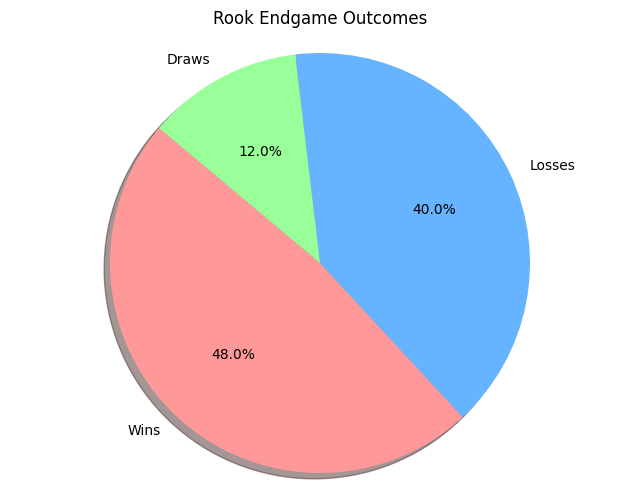

Percentage of games reaching rook endgame: 3.92%
Your win percentage in rook endgames: 48.00%


In [134]:
# Filter for games that reached a rook endgame
rook_endgames = df[df['RookEndgameReached']]

# Total number of games and rook endgames
total_games = len(df)
total_rook_endgames = len(rook_endgames)

# Calculate percentage of games that went to a rook endgame
percent_rook_endgames = (total_rook_endgames / total_games) * 100 if total_games > 0 else 0

# Your username
username = 'emrecubukcu'

# Filter for rook endgames that you won
your_wins_in_rook_endgames = rook_endgames[((rook_endgames['Result'] == '1-0') & (rook_endgames['White'] == username)) | 
                                           ((rook_endgames['Result'] == '0-1') & (rook_endgames['Black'] == username))]
total_wins_in_rook_endgames = len(your_wins_in_rook_endgames)

# Calculate your win percentage in rook endgames
percent_wins_in_rook_endgames = (total_wins_in_rook_endgames / total_rook_endgames) * 100 if total_rook_endgames > 0 else 0

your_draws_rook_endgame = rook_endgames[rook_endgames['Result'] == '1/2-1/2']
total_draws_rook_endgame = len(your_draws_rook_endgame)

your_losses_rook_endgame = rook_endgames[((rook_endgames['Result'] == '0-1') & (rook_endgames['White'] == username)) | 
                                         ((rook_endgames['Result'] == '1-0') & (rook_endgames['Black'] == username))]
total_losses_rook_endgame = len(your_losses_rook_endgame)

draw_percent_rook_endgames = (total_draws_rook_endgame / total_rook_endgames) * 100 if total_rook_endgames > 0 else 0
loss_percent_rook_endgames = (total_losses_rook_endgame / total_rook_endgames) * 100 if total_rook_endgames > 0 else 0

# Data for the pie chart
labels_rook_endgame_outcomes = ['Wins', 'Losses', 'Draws']
sizes_rook_endgame_outcomes = [percent_wins_in_rook_endgames, loss_percent_rook_endgames, draw_percent_rook_endgames]

# Colors for each slice
colors = ['#ff9999','#66b3ff','#99ff99']

# Create pie chart for rook endgame outcomes
plt.figure(figsize=(8, 6))
plt.pie(sizes_rook_endgame_outcomes, labels=labels_rook_endgame_outcomes, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Rook Endgame Outcomes')
plt.show()

print(f"Percentage of games reaching rook endgame: {percent_rook_endgames:.2f}%")
print(f"Your win percentage in rook endgames: {percent_wins_in_rook_endgames:.2f}%")

In [143]:
def categorize_game(row):
    if row['MyElo'] < row['OpponentElo']:
        return 'HigherRatedOpponent'
    elif row['MyElo'] > row['OpponentElo']:
        return 'LowerRatedOpponent'
    else:
        return 'EqualRated'

df['OpponentRatingCategory'] = df.apply(categorize_game, axis=1)

# Identify best win and worst loss
best_win_game = df_wins[df_wins['OpponentElo'] == best_win].iloc[0]
worst_loss_game = df_losses[df_losses['OpponentElo'] == worst_loss].iloc[0]

best_win_row = df[df['OpponentElo'] == df['OpponentElo'].max()]
worst_loss_row = df[df['OpponentElo'] == df['OpponentElo'].min()]

best_win_elo = best_win_row['OpponentElo'].iloc[0] if not best_win_row.empty else None
worst_loss_elo = worst_loss_row['OpponentElo'].iloc[0] if not worst_loss_row.empty else None

best_win_my_elo = best_win_row['MyElo'].iloc[0] if not best_win_row.empty else None
worst_loss_my_elo = worst_loss_row['MyElo'].iloc[0] if not worst_loss_row.empty else None

# Extracting opponent name and date for the best win
best_win_opponent = best_win_game['White'] if best_win_game['Black'] == username else best_win_game['Black']
best_win_date = best_win_game['Date']
best_win_opponent_elo = best_win_game['OpponentElo']
best_win_my_elo = best_win_game['MyElo']

# Extracting opponent name and date for the worst loss
worst_loss_opponent = worst_loss_game['White'] if worst_loss_game['Black'] == username else worst_loss_game['Black']
worst_loss_date = worst_loss_game['Date']
worst_loss_opponent_elo = worst_loss_game['OpponentElo']
worst_loss_my_elo = worst_loss_game['MyElo']

# Calculate win/loss/draw spread in percentage
def calculate_percentage_spread(df, total_games):
    wins = len(df[df['Result'] == '1-0']) / total_games * 100 if total_games > 0 else 0
    losses = len(df[df['Result'] == '0-1']) / total_games * 100 if total_games > 0 else 0
    draws = len(df[df['Result'] == '1/2-1/2']) / total_games * 100 if total_games > 0 else 0
    return wins, losses, draws

higher_rated_games = df[df['OpponentRatingCategory'] == 'HigherRatedOpponent']
lower_rated_games = df[df['OpponentRatingCategory'] == 'LowerRatedOpponent']

total_higher = len(higher_rated_games)
total_lower = len(lower_rated_games)

wins_higher_perc, losses_higher_perc, draws_higher_perc = calculate_percentage_spread(higher_rated_games, total_higher)
wins_lower_perc, losses_lower_perc, draws_lower_perc = calculate_percentage_spread(lower_rated_games, total_lower)


# Print the results
print(f"Average Opponent Rating: {average_opponent_rating}")
print(f"Best Win: Opponent - {best_win_opponent} (Elo {best_win_opponent_elo}), My Elo - {best_win_my_elo}, Date - {best_win_date}")
print(f"Worst Loss: Opponent - {worst_loss_opponent} (Elo {worst_loss_opponent_elo}), My Elo - {worst_loss_my_elo}, Date - {worst_loss_date}")
print(f"Against Higher-Rated Opponents: Wins: {wins_higher_perc:.2f}%, Losses: {losses_higher_perc:.2f}%, Draws: {draws_higher_perc:.2f}%")
print(f"Against Lower-Rated Opponents: Wins: {wins_lower_perc:.2f}%, Losses: {losses_lower_perc:.2f}%, Draws: {draws_lower_perc:.2f}%")

Average Opponent Rating: 1759.436420722135
Best Win: Opponent - necmettin-korkmaz (Elo 2089), My Elo - 1734, Date - 2021.04.25
Worst Loss: Opponent - mxggotbrain (Elo 266), My Elo - 1792, Date - 2022.08.27
Against Higher-Rated Opponents: Wins: 49.58%, Losses: 46.64%, Draws: 3.78%
Against Lower-Rated Opponents: Wins: 53.18%, Losses: 43.00%, Draws: 3.82%


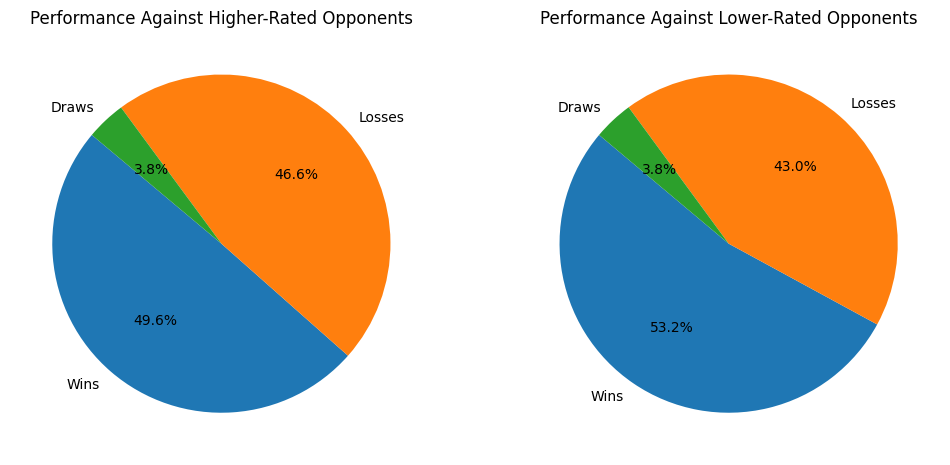

In [142]:
# Data for the pie charts
labels = ['Wins', 'Losses', 'Draws']
sizes_higher = [wins_higher_perc, losses_higher_perc, draws_higher_perc]
sizes_lower = [wins_lower_perc, losses_lower_perc, draws_lower_perc]


# Creating pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for performance against higher-rated opponents
ax1.pie(sizes_higher, labels=labels, autopct='%1.1f%%', startangle=140)
ax1.set_title('Performance Against Higher-Rated Opponents')

# Pie chart for performance against lower-rated opponents
ax2.pie(sizes_lower, labels=labels, autopct='%1.1f%%', startangle=140)
ax2.set_title('Performance Against Lower-Rated Opponents')

plt.show()


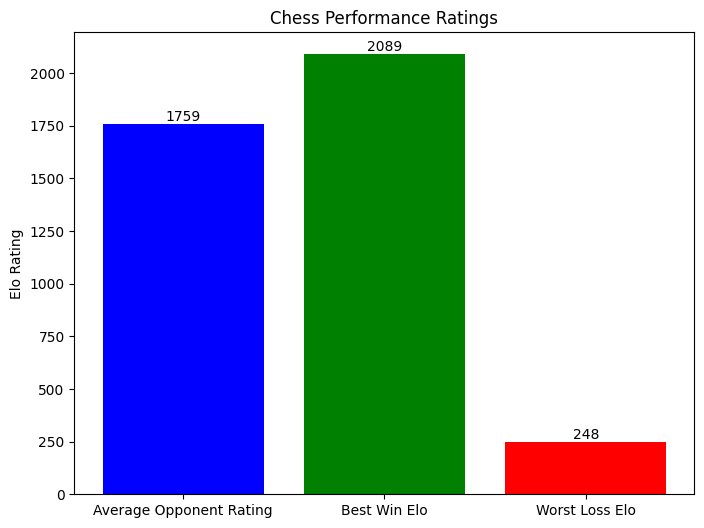

In [146]:

# Calculate the average opponent Elo rating
average_opponent_rating = df['OpponentElo'].astype(int).mean()

best_win_elo = df[(df['White'] == username) & (df['Result'] == '1-0') | (df['Black'] == username) & (df['Result'] == '0-1') ]['OpponentElo'].astype(int).max()

worst_loss_elo = df[(df['Black'] == username) & (df['Result'] == '1-0') | (df['White'] == username) & (df['Result'] == '0-1') ]['OpponentElo'].astype(int).min()

# Data for the bar graph
categories = ['Average Opponent Rating', 'Best Win Elo', 'Worst Loss Elo']
values = [int(average_opponent_rating), int(best_win_elo), int(worst_loss_elo)]


# Creating the bar graph
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['blue', 'green', 'red'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom', ha='center')

plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Elo Rating')
plt.title('Chess Performance Ratings')
plt.show()

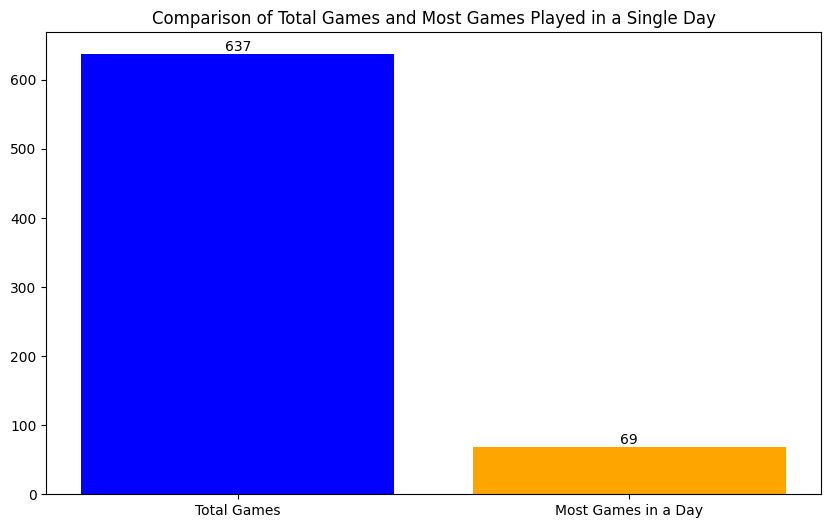

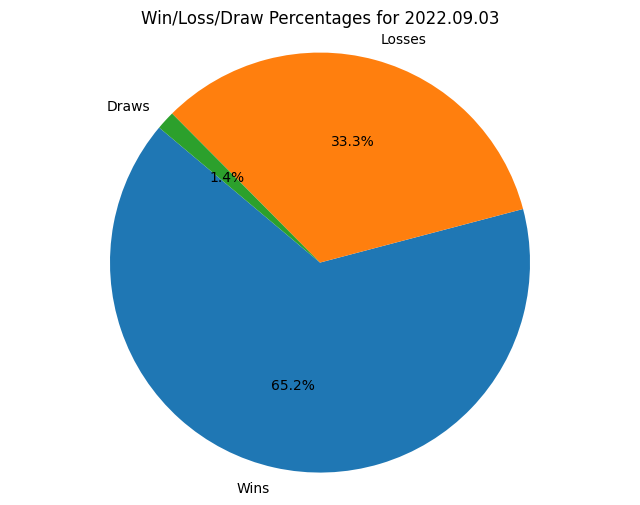

In [150]:
# Assuming df is your DataFrame and it has a 'Date' column with game dates
total_games = len(df)
games_by_date = df.groupby('Date').size()
most_games_date = games_by_date.idxmax()
most_games_count = games_by_date.max()

# Data for the bar chart
dates = ['Total Games', 'Most Games in a Day']
values = [total_games, most_games_count]

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(dates, values, color=['blue', 'orange'])

# Adding the exact values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Comparison of Total Games and Most Games Played in a Single Day')
plt.show()

games_on_most_played_day = df[df['Date'] == most_games_date]

# Calculate win/loss/draw counts for the most played day
wins_on_most_played_day = len(games_on_most_played_day[((games_on_most_played_day['White'] == username) & (games_on_most_played_day['Result'] == '1-0')) | 
                                                       ((games_on_most_played_day['Black'] == username) & (games_on_most_played_day['Result'] == '0-1'))])
losses_on_most_played_day = len(games_on_most_played_day[((games_on_most_played_day['White'] == username) & (games_on_most_played_day['Result'] == '0-1')) | 
                                                         ((games_on_most_played_day['Black'] == username) & (games_on_most_played_day['Result'] == '1-0'))])
draws_on_most_played_day = len(games_on_most_played_day[games_on_most_played_day['Result'] == '1/2-1/2'])

# Calculate win/loss/draw percentages for the most played day
total_games_most_played_day = wins_on_most_played_day + losses_on_most_played_day + draws_on_most_played_day
win_percentage = (wins_on_most_played_day / total_games_most_played_day) * 100 if total_games_most_played_day > 0 else 0
loss_percentage = (losses_on_most_played_day / total_games_most_played_day) * 100 if total_games_most_played_day > 0 else 0
draw_percentage = (draws_on_most_played_day / total_games_most_played_day) * 100 if total_games_most_played_day > 0 else 0

# Data for the pie chart
labels = ['Wins', 'Losses', 'Draws']
sizes = [win_percentage, loss_percentage, draw_percentage]

# Plot pie chart
plt.figure(figsize=(8, 6))  # This ensures the pie chart is large enough to be clear
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.title(f'Win/Loss/Draw Percentages for {most_games_date}')
plt.show()

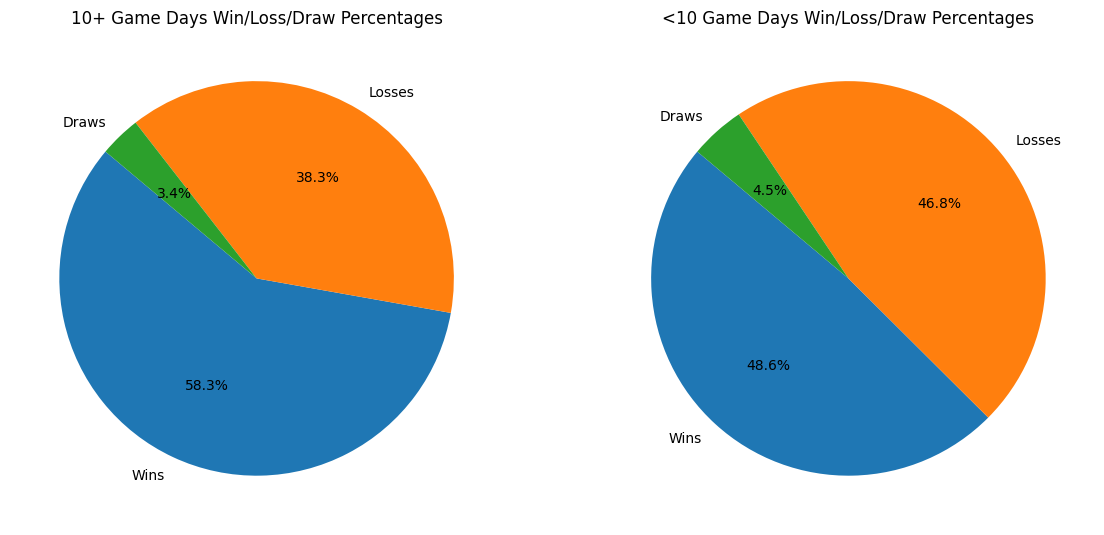

In [153]:



# Group by date and count the wins, losses, and draws
wins_by_date = df[((df['White'] == username) & (df['Result'] == '1-0')) | ((df['Black'] == username) & (df['Result'] == '0-1'))].groupby('Date').size()
losses_by_date = df[((df['White'] == username) & (df['Result'] == '0-1')) | ((df['Black'] == username) & (df['Result'] == '1-0'))].groupby('Date').size()
draws_by_date = df[df['Result'] == '1/2-1/2'].groupby('Date').size()

# Find the dates with 10+ games and less than 10 games
games_by_date = df.groupby('Date').size()
dates_with_10_plus_games = games_by_date[games_by_date >= 10].index
dates_with_less_than_10_games = games_by_date[games_by_date < 10].index

# Calculate wins, losses, and draws on days with 10+ games
wins_10_plus = wins_by_date[wins_by_date.index.isin(dates_with_10_plus_games)].sum()
losses_10_plus = losses_by_date[losses_by_date.index.isin(dates_with_10_plus_games)].sum()
draws_10_plus = draws_by_date[draws_by_date.index.isin(dates_with_10_plus_games)].sum()

# Calculate win/loss/draw percentages for days with 10+ games
total_10_plus = games_by_date[dates_with_10_plus_games].sum()
percent_wins_10_plus = (wins_10_plus / total_10_plus) * 100 if total_10_plus > 0 else 0
percent_losses_10_plus = (losses_10_plus / total_10_plus) * 100 if total_10_plus > 0 else 0
percent_draws_10_plus = (draws_10_plus / total_10_plus) * 100 if total_10_plus > 0 else 0

# Calculate wins, losses, and draws on days with less than 10 games
wins_less_than_10 = wins_by_date[wins_by_date.index.isin(dates_with_less_than_10_games)].sum()
losses_less_than_10 = losses_by_date[losses_by_date.index.isin(dates_with_less_than_10_games)].sum()
draws_less_than_10 = draws_by_date[draws_by_date.index.isin(dates_with_less_than_10_games)].sum()

# Calculate win/loss/draw percentages for days with less than 10 games
total_less_than_10 = games_by_date[dates_with_less_than_10_games].sum()
percent_wins_less_than_10 = (wins_less_than_10 / total_less_than_10) * 100 if total_less_than_10 > 0 else 0
percent_losses_less_than_10 = (losses_less_than_10 / total_less_than_10) * 100 if total_less_than_10 > 0 else 0
percent_draws_less_than_10 = (draws_less_than_10 / total_less_than_10) * 100 if total_less_than_10 > 0 else 0

# Labels for pie charts
labels = ['Wins', 'Losses', 'Draws']

# Data for pie charts
sizes_10_plus = [percent_wins_10_plus, percent_losses_10_plus, percent_draws_10_plus]
sizes_less_than_10 = [percent_wins_less_than_10, percent_losses_less_than_10, percent_draws_less_than_10]

# Plotting pie charts
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for 10+ game days
axs[0].pie(sizes_10_plus, labels=labels, autopct='%1.1f%%', startangle=140)
axs[0].set_title('10+ Game Days Win/Loss/Draw Percentages')

# Pie chart for less than 10 game days
axs[1].pie(sizes_less_than_10, labels=labels, autopct='%1.1f%%', startangle=140)
axs[1].set_title('<10 Game Days Win/Loss/Draw Percentages')

plt.show()

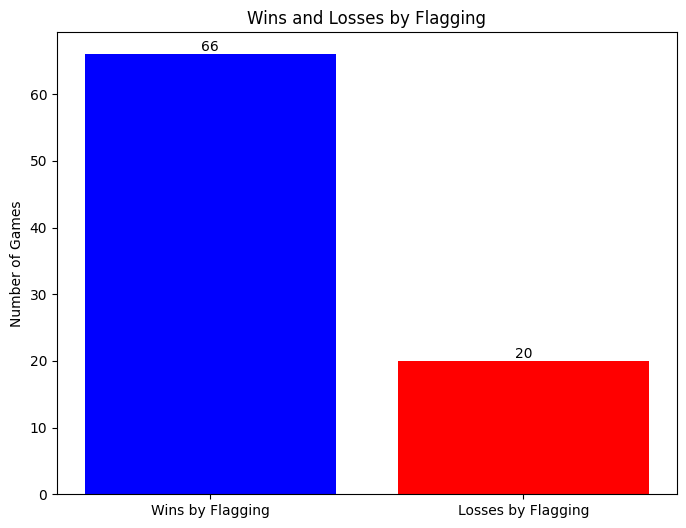

In [156]:

wins_by_flagging = df['WonByFlagging'].sum()
losses_by_flagging = df['LostByFlagging'].sum()

# Data for the bar graph
categories = ['Wins by Flagging', 'Losses by Flagging']
values = [wins_by_flagging, losses_by_flagging]

# Creating the bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'red'])
bars = plt.bar(categories, values, color=['blue', 'red'])

# Adding the exact values on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.ylabel('Number of Games')
plt.title('Wins and Losses by Flagging')
plt.show()

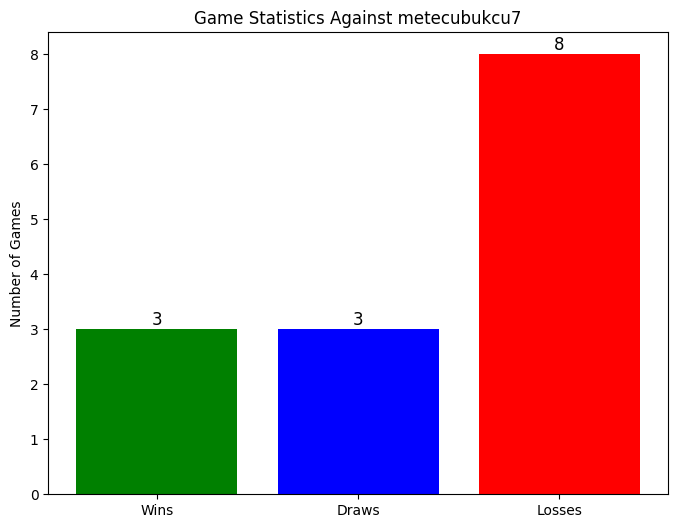

Against metecubukcu7: Wins: 3, Draws: 3, Losses: 8


In [167]:
opponent_username = 'metecubukcu7'

# Filter games against the specific opponent
games_against_opponent = df[(df['White'] == user_username) & (df['Black'] == opponent_username) | 
                            (df['White'] == opponent_username) & (df['Black'] == user_username)]

# Count wins, draws, and losses against the opponent
wins = len(games_against_opponent[((games_against_opponent['White'] == user_username) & (games_against_opponent['Result'] == '1-0')) |
                                  ((games_against_opponent['Black'] == user_username) & (games_against_opponent['Result'] == '0-1'))])
draws = len(games_against_opponent[games_against_opponent['Result'] == '1/2-1/2'])
losses = len(games_against_opponent[((games_against_opponent['White'] == user_username) & (games_against_opponent['Result'] == '0-1')) |
                                    ((games_against_opponent['Black'] == user_username) & (games_against_opponent['Result'] == '1-0'))])

categories = ['Wins', 'Draws', 'Losses']
values = [wins, draws, losses]

# Creating the bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'blue', 'red'])

# Adding the exact values on the bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)
plt.title(f'Game Statistics Against {opponent_username}')
plt.ylabel('Number of Games')
plt.show()

# Print the results
print(f"Against {opponent_username}: Wins: {wins}, Draws: {draws}, Losses: {losses}")